In [17]:
dataset_name = "nyc_taxi"
path = "data/" + dataset_name + ".csv"
gaussian_window_size = 1024

In [18]:
import adclasses
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import holidays
import math
import warnings
warnings.filterwarnings('ignore')

# Preprocess dataset

In [19]:
data = pd.read_csv(path, header=0)
start_date = data["timestamp"].values[0]
end_date = data["timestamp"].values[-1]
print("Start date: ", start_date)
print("End date: ", end_date)
data["timestamp"] = pd.to_datetime(data["timestamp"], format="%Y-%m-%d %H:%M:%S")

print("Missing time stamps: \n", adclasses.find_missing_time_steps(start_date, end_date, '30min', data))

# write to csv for htm
# data.to_csv("/home/cfreeman/Desktop/prefill/" + dataset_name + ".csv", index=False)

data["timestamp"] = pd.to_datetime(data["timestamp"], format="%Y-%m-%d %H:%M:%S")
ad = adclasses.UnivariateAnomalyDetection(dataframe=data, timestep="30min", dateformat="%Y-%m-%d %H:%M:%S", name=dataset_name)
print("Length: ", ad.get_length())
print("Time step size: ", ad.get_timestep())
print("Date Format: ", ad.get_dateformat())
true_outlier_dates = ["2014-11-01 19:00:00",
                      "2014-11-27 15:30:00",
                      "2014-12-25 15:00:00",
                      "2015-01-01 01:00:00",
                      "2015-01-27 00:00:00"]
true_outlier_indices = ad.convert_true_outlier_date(true_outlier_dates)
print("True outlier indices: ", true_outlier_indices)

Start date:  2014-07-01 00:00:00
End date:  2015-01-31 23:30:00
Missing time stamps: 
 DatetimeIndex([], dtype='datetime64[ns]', freq='30T')
Length:  10320
Time step size:  30min
Date Format:  %Y-%m-%d %H:%M:%S
True outlier indices:  [5942, 7183, 8526, 8834, 10080]


# SARIMA


 Fitting models using approximations to speed things up...

 Regression with ARIMA(2,1,2) errors : 26359.5
 Regression with ARIMA(0,1,0) errors : 26949.21
 Regression with ARIMA(1,1,0) errors : 26380.57
 Regression with ARIMA(0,1,1) errors : 26778.04
 ARIMA(0,1,0)                    : 26947.12
 Regression with ARIMA(1,1,2) errors : 26352.83
 Regression with ARIMA(0,1,2) errors : 26491.11
 Regression with ARIMA(1,1,1) errors : 26376.52
 Regression with ARIMA(1,1,3) errors : 26338.9
 Regression with ARIMA(0,1,3) errors : 26428.85
 Regression with ARIMA(2,1,3) errors : 26354.72
 Regression with ARIMA(1,1,4) errors : 26326.09
 Regression with ARIMA(0,1,4) errors : 26331.34
 Regression with ARIMA(2,1,4) errors : 26335.25
 Regression with ARIMA(1,1,5) errors : 26331.03
 Regression with ARIMA(0,1,5) errors : 26326.39
 Regression with ARIMA(2,1,5) errors : 26329.02
 ARIMA(1,1,4)                    : 26320.02
 ARIMA(0,1,4)                    : 26328.11
 ARIMA(1,1,3)                    : 26336.

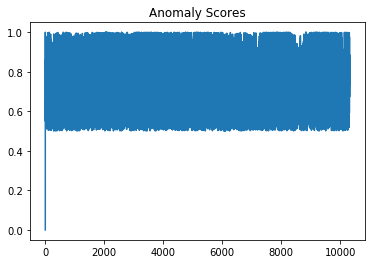

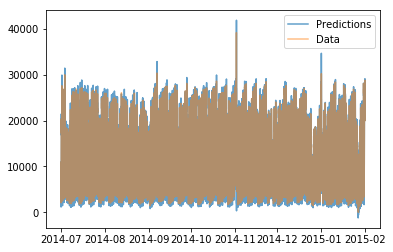

Time:  77.49626183509827


['anomaly_scores/SARIMA_auto/nyc_taxi']

In [4]:
save_path = "anomaly_scores/SARIMA_auto/" + dataset_name
output_dict = ad.sarimax(gaussian_window_size=gaussian_window_size, step_size=100, auto=True,
                         use_exog=True, s=48, plot_anomaly_scores=True,plot_forecast=True)
print("Time: ", output_dict["Time"])
joblib.dump(output_dict, save_path)

# GLM

In [20]:
# optimize
etas = [.5,1]
lambdas = [.99, .999, .9999]

opt_dict = {}

for eta in etas:
    for lambda_ in lambdas:
       
        mse = ad.glm(gaussian_window_size=gaussian_window_size, 
                     family='poisson', 
                     eta=eta, 
                     lambda_=lambda_)["MSE"]

        print("eta: ", eta)
        print("lambda: ", lambda_)
        print("MSE: ",mse)

        key_str = "eta " + str(eta) + " lambda " + str(lambda_)

        opt_dict[key_str] = mse

best_params = min(opt_dict, key=opt_dict.get)
print("\nbest params: ", best_params)

 21%|██        | 2175/10320 [00:00<00:00, 21739.40it/s]

Initial Mean 15025.88242894057
Initial StdDev 6711.116807064388


 23%|██▎       | 2348/10320 [00:00<00:00, 23472.69it/s]

eta:  0.5
lambda:  0.99
MSE:  inf
Initial Mean 15025.88242894057
Initial StdDev 6711.116807064388


 24%|██▎       | 2449/10320 [00:00<00:00, 24481.38it/s]

eta:  0.5
lambda:  0.999
MSE:  17530082.734295357
Initial Mean 15025.88242894057
Initial StdDev 6711.116807064388


 24%|██▎       | 2435/10320 [00:00<00:00, 24343.12it/s]

eta:  0.5
lambda:  0.9999
MSE:  17013662.488420192
Initial Mean 15025.88242894057
Initial StdDev 6711.116807064388


 24%|██▎       | 2432/10320 [00:00<00:00, 24309.01it/s]

eta:  1
lambda:  0.99
MSE:  18959632.901105423
Initial Mean 15025.88242894057
Initial StdDev 6711.116807064388


 23%|██▎       | 2367/10320 [00:00<00:00, 23661.33it/s]

eta:  1
lambda:  0.999
MSE:  17676222.247607794
Initial Mean 15025.88242894057
Initial StdDev 6711.116807064388


100%|██████████| 10320/10320 [00:00<00:00, 23973.76it/s]


eta:  1
lambda:  0.9999
MSE:  17072788.84355432

best params:  eta 0.5 lambda 0.9999


 23%|██▎       | 2349/10320 [00:00<00:00, 23479.39it/s]

Initial Mean 15025.88242894057
Initial StdDev 6711.116807064388


100%|██████████| 10320/10320 [00:00<00:00, 23633.66it/s]


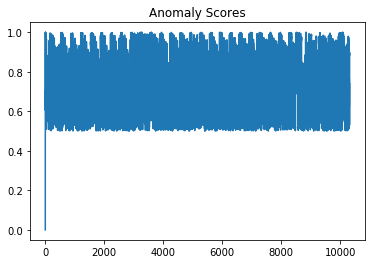

Time:  1.7882442474365234


['anomaly_scores/GLM/nyc_taxi']

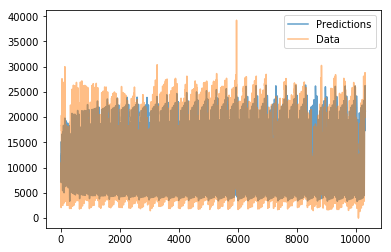

In [21]:
save_path = "anomaly_scores/GLM/" + dataset_name
output_dict = ad.glm(gaussian_window_size=gaussian_window_size, family='poisson', 
                     eta=.5, lambda_=0.9999,plot_anomaly_scores=True, plot_forecast=True)
print("Time: ", output_dict["Time"])
joblib.dump(output_dict, save_path)

# Anomalous

In [7]:
# only need for one window size
# save_path = "anomaly_scores/anomalous/" + dataset_name
# output_dict = ad.anomalous(ts_length=100,
#                            upper=(.2/100) * ad.get_length(),
#                            plot_anomaly_score=True)
# print("Time: ", output_dict["Time"])
# joblib.dump(output_dict, save_path)

# Facebook Prophet

In [8]:
# optimization step

step_sizes = [100, 200]
seasonality_prior_scales = [1, 5, 10, 15, 20]
seasonality_modes = ["additive", "multiplicative"]
changepoint_prior_scales = [.01, .05, .1, .15, .2]
opt_dict = {}

for step_size in step_sizes:
    for seasonality_prior_scale in seasonality_prior_scales:
        for seasonality_mode in seasonality_modes:
            for changepoint_prior_scale in changepoint_prior_scales:
                
                mse = ad.facebook_prophet(gaussian_window_size=gaussian_window_size, 
                                          daily_seasonality=True, 
                                          seasonality_prior_scale=seasonality_prior_scale,
                                          seasonality_mode=seasonality_mode,
                                          changepoint_prior_scale=changepoint_prior_scale,
                                          step_size=step_size,
                                          optimize=True)
                print("Step Size: ", step_size)
                print("Seasonality Prior Scale: ", seasonality_prior_scale)
                print("Seasonality Mode: ", seasonality_mode)
                print("Changepoint Prior Scale: ", changepoint_prior_scale)
                print("MSE: ",mse)
                
                key_str = "Step Size " + str(step_size) + " Seasonality Prior Scale " + str(seasonality_prior_scale) +" Seasonality Mode " + str(seasonality_mode) +" Changepoint Prior Scale" + str(changepoint_prior_scale)
                
                opt_dict[key_str] = mse

best_params = min(opt_dict, key=opt_dict.get)
print("\nbest params: ", best_params)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  1
Seasonality Mode:  additive
Changepoint Prior Scale:  0.01
MSE:  11377368.405815948


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  1
Seasonality Mode:  additive
Changepoint Prior Scale:  0.05
MSE:  11292281.988107037


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  1
Seasonality Mode:  additive
Changepoint Prior Scale:  0.1
MSE:  11303508.59231234


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  1
Seasonality Mode:  additive
Changepoint Prior Scale:  0.15
MSE:  11306365.95162372


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  1
Seasonality Mode:  additive
Changepoint Prior Scale:  0.2
MSE:  11302707.75151242


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  1
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.01
MSE:  11375155.133128943


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  1
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.05
MSE:  11322657.284714773


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  1
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.1
MSE:  11347085.719506493


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  1
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.15
MSE:  11349631.600914335


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  1
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.2
MSE:  11340210.876834882


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  5
Seasonality Mode:  additive
Changepoint Prior Scale:  0.01
MSE:  11375267.193718502


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  5
Seasonality Mode:  additive
Changepoint Prior Scale:  0.05
MSE:  11292311.005514337


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  5
Seasonality Mode:  additive
Changepoint Prior Scale:  0.1
MSE:  11305337.736560773


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  5
Seasonality Mode:  additive
Changepoint Prior Scale:  0.15
MSE:  11307098.048197113


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  5
Seasonality Mode:  additive
Changepoint Prior Scale:  0.2
MSE:  11302663.189488022


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  5
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.01
MSE:  11390987.89830699


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  5
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.05
MSE:  11315389.251141652


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  5
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.1
MSE:  11347407.666115578


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  5
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.15
MSE:  11346307.203641778


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  5
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.2
MSE:  11336220.447598027


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  10
Seasonality Mode:  additive
Changepoint Prior Scale:  0.01
MSE:  11371807.566812254


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  10
Seasonality Mode:  additive
Changepoint Prior Scale:  0.05
MSE:  11290350.926380215


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  10
Seasonality Mode:  additive
Changepoint Prior Scale:  0.1
MSE:  11309596.711920254


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  10
Seasonality Mode:  additive
Changepoint Prior Scale:  0.15
MSE:  11311478.157020364


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  10
Seasonality Mode:  additive
Changepoint Prior Scale:  0.2
MSE:  11295523.038198857


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  10
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.01
MSE:  11371295.066175446


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  10
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.05
MSE:  11317660.073701726


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  10
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.1
MSE:  11349375.202860566


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  10
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.15
MSE:  11349633.175442852


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  10
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.2
MSE:  11343128.778901594


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  15
Seasonality Mode:  additive
Changepoint Prior Scale:  0.01
MSE:  11379982.27289746


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  15
Seasonality Mode:  additive
Changepoint Prior Scale:  0.05
MSE:  11290679.418260915


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  15
Seasonality Mode:  additive
Changepoint Prior Scale:  0.1
MSE:  11303580.232152874


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  15
Seasonality Mode:  additive
Changepoint Prior Scale:  0.15
MSE:  11304310.677374264


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  15
Seasonality Mode:  additive
Changepoint Prior Scale:  0.2
MSE:  11302034.780187866


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  15
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.01
MSE:  11371340.031779647


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  15
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.05
MSE:  11316745.71241023


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  15
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.1
MSE:  11349216.45602485


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  15
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.15
MSE:  11348915.956478216


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  15
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.2
MSE:  11341493.936891347


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  20
Seasonality Mode:  additive
Changepoint Prior Scale:  0.01
MSE:  11370692.445636833


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  20
Seasonality Mode:  additive
Changepoint Prior Scale:  0.05
MSE:  11286771.754297927


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  20
Seasonality Mode:  additive
Changepoint Prior Scale:  0.1
MSE:  11303650.40123282


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  20
Seasonality Mode:  additive
Changepoint Prior Scale:  0.15
MSE:  11307657.036927963


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  20
Seasonality Mode:  additive
Changepoint Prior Scale:  0.2
MSE:  11309607.35531065


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  20
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.01
MSE:  11368951.711382942


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  20
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.05
MSE:  11316073.591280244


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  20
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.1
MSE:  11345667.335896382


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  20
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.15
MSE:  11352171.172079975


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  20
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.2
MSE:  11344613.625251701


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  1
Seasonality Mode:  additive
Changepoint Prior Scale:  0.01
MSE:  11377368.405815948


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  1
Seasonality Mode:  additive
Changepoint Prior Scale:  0.05
MSE:  11292281.988107037


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  1
Seasonality Mode:  additive
Changepoint Prior Scale:  0.1
MSE:  11303508.59231234


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  1
Seasonality Mode:  additive
Changepoint Prior Scale:  0.15
MSE:  11306365.95162372


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  1
Seasonality Mode:  additive
Changepoint Prior Scale:  0.2
MSE:  11302707.75151242


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  1
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.01
MSE:  11375155.133128943


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  1
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.05
MSE:  11322657.284714773


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  1
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.1
MSE:  11347085.719506493


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  1
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.15
MSE:  11349631.600914335


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  1
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.2
MSE:  11340210.876834882


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  5
Seasonality Mode:  additive
Changepoint Prior Scale:  0.01
MSE:  11375267.193718502


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  5
Seasonality Mode:  additive
Changepoint Prior Scale:  0.05
MSE:  11292311.005514337


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  5
Seasonality Mode:  additive
Changepoint Prior Scale:  0.1
MSE:  11305337.736560773


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  5
Seasonality Mode:  additive
Changepoint Prior Scale:  0.15
MSE:  11307098.048197113


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  5
Seasonality Mode:  additive
Changepoint Prior Scale:  0.2
MSE:  11302663.189488022


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  5
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.01
MSE:  11390987.89830699


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  5
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.05
MSE:  11315389.251141652


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  5
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.1
MSE:  11347407.666115578


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  5
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.15
MSE:  11346307.203641778


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  5
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.2
MSE:  11336220.447598027


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  10
Seasonality Mode:  additive
Changepoint Prior Scale:  0.01
MSE:  11371807.566812254


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  10
Seasonality Mode:  additive
Changepoint Prior Scale:  0.05
MSE:  11290350.926380215


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  10
Seasonality Mode:  additive
Changepoint Prior Scale:  0.1
MSE:  11309596.711920254


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  10
Seasonality Mode:  additive
Changepoint Prior Scale:  0.15
MSE:  11311478.157020364


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  10
Seasonality Mode:  additive
Changepoint Prior Scale:  0.2
MSE:  11295523.038198857


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  10
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.01
MSE:  11371295.066175446


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  10
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.05
MSE:  11317660.073701726


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  10
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.1
MSE:  11349375.202860566


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  10
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.15
MSE:  11349633.175442852


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  10
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.2
MSE:  11343128.778901594


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  15
Seasonality Mode:  additive
Changepoint Prior Scale:  0.01
MSE:  11379982.27289746


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  15
Seasonality Mode:  additive
Changepoint Prior Scale:  0.05
MSE:  11290679.418260915


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  15
Seasonality Mode:  additive
Changepoint Prior Scale:  0.1
MSE:  11303580.232152874


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  15
Seasonality Mode:  additive
Changepoint Prior Scale:  0.15
MSE:  11304310.677374264


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  15
Seasonality Mode:  additive
Changepoint Prior Scale:  0.2
MSE:  11302034.780187866


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  15
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.01
MSE:  11371340.031779647


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  15
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.05
MSE:  11316745.71241023


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  15
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.1
MSE:  11349216.45602485


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  15
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.15
MSE:  11348915.956478216


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  15
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.2
MSE:  11341493.936891347


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  20
Seasonality Mode:  additive
Changepoint Prior Scale:  0.01
MSE:  11370692.445636833


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  20
Seasonality Mode:  additive
Changepoint Prior Scale:  0.05
MSE:  11286771.754297927


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  20
Seasonality Mode:  additive
Changepoint Prior Scale:  0.1
MSE:  11303650.40123282


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  20
Seasonality Mode:  additive
Changepoint Prior Scale:  0.15
MSE:  11307657.036927963


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  20
Seasonality Mode:  additive
Changepoint Prior Scale:  0.2
MSE:  11309607.35531065


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  20
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.01
MSE:  11368951.711382942


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  20
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.05
MSE:  11316073.591280244


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  20
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.1
MSE:  11345667.335896382


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  20
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.15
MSE:  11352171.172079975
Step Size:  200
Seasonality Prior Scale:  20
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.2
MSE:  11344613.625251701

best params:  Step Size 100 Seasonality Prior Scale 20 Seasonality Mode additive Changepoint Prior Scale0.05


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


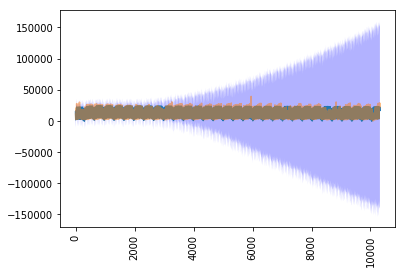

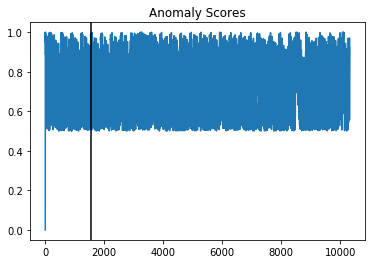

Time:  27.859687089920044


['anomaly_scores/Prophet/nyc_taxi']

In [9]:
save_path = "anomaly_scores/Prophet/" + dataset_name
output_dict = ad.facebook_prophet(gaussian_window_size=gaussian_window_size, 
                                  daily_seasonality=True, 
                                  seasonality_prior_scale=20,
                                  seasonality_mode="additive",
                                  changepoint_prior_scale=.05,
                                  step_size=100,
                                  plot_forecast=True,
                                  plot_anomaly_score=True)
print("Time: ", output_dict["Time"])
joblib.dump(output_dict, save_path)

# Twitter AD

In [10]:
# only need for one window size
# save_path = "anomaly_scores/Twitter/" + dataset_name
# output_dict = ad.twitterad(period=48,max_anoms=((.2/100) * ad.get_length())/ad.get_length(), direction='both', alpha=.001, plot_anomaly_score=True)
# print("Time: ", output_dict["Time"])
# joblib.dump(output_dict, save_path)

# HTM

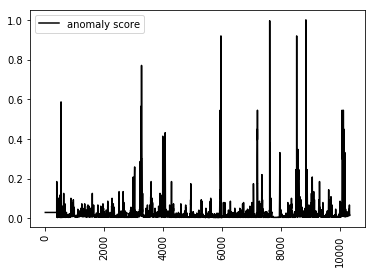

Time:  107.92


['anomaly_scores/HTM/nyc_taxi']

In [11]:
htm_results_path = "htm_studio_results/" + "htm_results_" + dataset_name + "_number_of_rides.csv"
htm_results = pd.read_csv(htm_results_path, header=0)

plt.plot(htm_results["raw_anomaly_score"], color="black", label="anomaly score")
plt.legend()
plt.xticks(rotation=90)
plt.show()

anomaly_scores = np.nan_to_num(htm_results["raw_anomaly_score"].values)

save_path = "anomaly_scores/HTM/" + dataset_name
print("Time: ",107.92)
output_dict = {"Anomaly Scores": anomaly_scores, "Time": 107.92}
joblib.dump(output_dict, save_path)

# STL Resid

In [12]:
# optimization step
swindows = ["periodic", 5,7,9,11]
sdegrees = [0,1,2]
twindows = [5,7,9,11]
tdegrees = [0,1,2]
inners = [1,2,3]
outers = [0,1]
opt_dict = {}

for swindow in swindows:
    for sdegree in sdegrees:
        for twindow in twindows:
            for tdegree in tdegrees:
                for inner in inners:
                    for outer in outers:
                        
                        print("swindow: ", swindow)
                        print("sdegree: ", sdegree)
                        print("twindow: ", twindow)
                        print("tdegree: ", tdegree)
                        print("inner: ", inner)
                        print("outer: ", outer)
                        
                        
                        try:
  
                            stl_resid_sum = ad.stl_resid(gaussian_window_size=gaussian_window_size, step_size=100,n_periods=48, swindow=swindow, 
                                                         sdegree=sdegree, twindow=twindow, tdegree=tdegree, inner=inner, 
                                                         outer=outer, fill_option="linear", optimize=True)


                            print("STL Resid Sum: ",stl_resid_sum)

                            key_str = "swindow " + str(swindow) + " sdegree " + str(sdegree) +" twindow " + str(twindow) +" tdegree " + str(tdegree) +" inner " + str(inner) +" outer " + str(outer)

                            opt_dict[key_str] = stl_resid_sum

                        except:
                            print("Fail")
                            continue

best_params = min(opt_dict, key=opt_dict.get)
print("\nbest params: ", best_params)

swindow:  periodic
sdegree:  0
twindow:  5
tdegree:  0
inner:  1
outer:  0
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  161733225.54035804
swindow:  periodic
sdegree:  0
twindow:  5
tdegree:  0
inner:  1
outer:  1
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  161912409.34857857
swindow:  periodic
sdegree:  0
twindow:  5
tdegree:  0
inner:  2
outer:  0
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  161692022.99303696
swindow:  periodic
sdegree:  0
twindow:  5
tdegree:  0
inner:  2
outer:  1
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  161733225.54035804
swindow:  periodic
sdegree:  0
twindow:  5
tdegree:  0
inner:  3
outer:  0
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  161675101.7337351
swindow:  periodic
sdegree:  0
twindow:  5
tdegree:  0
inner:  3
outer:  1
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  161706187.72618297
swindow:  periodic
sdegree:  0
twindow:  5
tdegree:  1
inne

R stlplus completed: 1548 no missing True
STL Resid Sum:  176452954.74882331
swindow:  periodic
sdegree:  0
twindow:  9
tdegree:  2
inner:  3
outer:  1
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  176454705.61379495
swindow:  periodic
sdegree:  0
twindow:  11
tdegree:  0
inner:  1
outer:  0
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  780119760.3922455
swindow:  periodic
sdegree:  0
twindow:  11
tdegree:  0
inner:  1
outer:  1
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  780929018.1506985
swindow:  periodic
sdegree:  0
twindow:  11
tdegree:  0
inner:  2
outer:  0
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  779860432.9342015
swindow:  periodic
sdegree:  0
twindow:  11
tdegree:  0
inner:  2
outer:  1
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  780119760.3922455
swindow:  periodic
sdegree:  0
twindow:  11
tdegree:  0
inner:  3
outer:  0
1548
R stlplus completed: 1548 no missing True
STL Resid Sum: 

R stlplus completed: 1548 no missing True
STL Resid Sum:  108911955.25312325
swindow:  periodic
sdegree:  1
twindow:  7
tdegree:  2
inner:  3
outer:  0
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  108902036.9912306
swindow:  periodic
sdegree:  1
twindow:  7
tdegree:  2
inner:  3
outer:  1
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  108904747.52194859
swindow:  periodic
sdegree:  1
twindow:  9
tdegree:  0
inner:  1
outer:  0
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  482823771.23709035
swindow:  periodic
sdegree:  1
twindow:  9
tdegree:  0
inner:  1
outer:  1
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  483450186.532101
swindow:  periodic
sdegree:  1
twindow:  9
tdegree:  0
inner:  2
outer:  0
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  482587756.38873035
swindow:  periodic
sdegree:  1
twindow:  9
tdegree:  0
inner:  2
outer:  1
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  482

R stlplus completed: 1548 no missing True
STL Resid Sum:  42340.0409019934
swindow:  periodic
sdegree:  2
twindow:  5
tdegree:  2
inner:  2
outer:  1
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  44590.93013331197
swindow:  periodic
sdegree:  2
twindow:  5
tdegree:  2
inner:  3
outer:  0
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  40202.77348382113
swindow:  periodic
sdegree:  2
twindow:  5
tdegree:  2
inner:  3
outer:  1
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  43450.91259918842
swindow:  periodic
sdegree:  2
twindow:  7
tdegree:  0
inner:  1
outer:  0
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  303203997.8066859
swindow:  periodic
sdegree:  2
twindow:  7
tdegree:  0
inner:  1
outer:  1
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  303576224.4511325
swindow:  periodic
sdegree:  2
twindow:  7
tdegree:  0
inner:  2
outer:  0
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  3030861

R stlplus completed: 1548 no missing True
STL Resid Sum:  260113745.9678474
swindow:  periodic
sdegree:  2
twindow:  11
tdegree:  2
inner:  2
outer:  0
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  259809336.7353588
swindow:  periodic
sdegree:  2
twindow:  11
tdegree:  2
inner:  2
outer:  1
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  259811954.61000106
swindow:  periodic
sdegree:  2
twindow:  11
tdegree:  2
inner:  3
outer:  0
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  259814646.59819221
swindow:  periodic
sdegree:  2
twindow:  11
tdegree:  2
inner:  3
outer:  1
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  259807000.73981917
swindow:  5
sdegree:  0
twindow:  5
tdegree:  0
inner:  1
outer:  0
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  82470058.32523486
swindow:  5
sdegree:  0
twindow:  5
tdegree:  0
inner:  1
outer:  1
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  79468217.6885

R stlplus completed: 1548 no missing True
STL Resid Sum:  93311482.70273307
swindow:  5
sdegree:  0
twindow:  9
tdegree:  2
inner:  2
outer:  1
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  92703090.27252096
swindow:  5
sdegree:  0
twindow:  9
tdegree:  2
inner:  3
outer:  0
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  93445873.7560159
swindow:  5
sdegree:  0
twindow:  9
tdegree:  2
inner:  3
outer:  1
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  93173286.16961865
swindow:  5
sdegree:  0
twindow:  11
tdegree:  0
inner:  1
outer:  0
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  303496940.270713
swindow:  5
sdegree:  0
twindow:  11
tdegree:  0
inner:  1
outer:  1
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  271395688.4376234
swindow:  5
sdegree:  0
twindow:  11
tdegree:  0
inner:  2
outer:  0
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  333362791.29549354
swindow:  5
sdegree:  0
twin

R stlplus completed: 1548 no missing True
STL Resid Sum:  49728773.080048576
swindow:  5
sdegree:  1
twindow:  7
tdegree:  2
inner:  3
outer:  0
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  50504387.72238809
swindow:  5
sdegree:  1
twindow:  7
tdegree:  2
inner:  3
outer:  1
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  50230695.972536705
swindow:  5
sdegree:  1
twindow:  9
tdegree:  0
inner:  1
outer:  0
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  184434801.98373586
swindow:  5
sdegree:  1
twindow:  9
tdegree:  0
inner:  1
outer:  1
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  172581592.63962436
swindow:  5
sdegree:  1
twindow:  9
tdegree:  0
inner:  2
outer:  0
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  196973575.60398716
swindow:  5
sdegree:  1
twindow:  9
tdegree:  0
inner:  2
outer:  1
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  184434801.98373586
swindow:  5
sdegree:  1


R stlplus completed: 1548 no missing True
STL Resid Sum:  37.87117698437971
swindow:  5
sdegree:  2
twindow:  5
tdegree:  2
inner:  3
outer:  1
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  206.7505258345841
swindow:  5
sdegree:  2
twindow:  7
tdegree:  0
inner:  1
outer:  0
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  15808555.58687959
swindow:  5
sdegree:  2
twindow:  7
tdegree:  0
inner:  1
outer:  1
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  14907417.286972571
swindow:  5
sdegree:  2
twindow:  7
tdegree:  0
inner:  2
outer:  0
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  16245886.095591282
swindow:  5
sdegree:  2
twindow:  7
tdegree:  0
inner:  2
outer:  1
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  15808555.58687959
swindow:  5
sdegree:  2
twindow:  7
tdegree:  0
inner:  3
outer:  0
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  16294259.23304642
swindow:  5
sdegree:  2
twin

R stlplus completed: 1548 no missing True
STL Resid Sum:  15816633.131427666
swindow:  7
sdegree:  0
twindow:  5
tdegree:  0
inner:  1
outer:  0
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  113376144.43208355
swindow:  7
sdegree:  0
twindow:  5
tdegree:  0
inner:  1
outer:  1
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  110229283.81360857
swindow:  7
sdegree:  0
twindow:  5
tdegree:  0
inner:  2
outer:  0
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  115650690.24915491
swindow:  7
sdegree:  0
twindow:  5
tdegree:  0
inner:  2
outer:  1
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  113376144.43208355
swindow:  7
sdegree:  0
twindow:  5
tdegree:  0
inner:  3
outer:  0
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  115954889.24633653
swindow:  7
sdegree:  0
twindow:  5
tdegree:  0
inner:  3
outer:  1
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  115013495.47362015
swindow:  7
sdegree:  0

R stlplus completed: 1548 no missing True
STL Resid Sum:  469904509.7988656
swindow:  7
sdegree:  0
twindow:  11
tdegree:  0
inner:  1
outer:  1
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  424695151.1877865
swindow:  7
sdegree:  0
twindow:  11
tdegree:  0
inner:  2
outer:  0
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  497945421.08507967
swindow:  7
sdegree:  0
twindow:  11
tdegree:  0
inner:  2
outer:  1
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  469904509.7988656
swindow:  7
sdegree:  0
twindow:  11
tdegree:  0
inner:  3
outer:  0
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  502312129.98096925
swindow:  7
sdegree:  0
twindow:  11
tdegree:  0
inner:  3
outer:  1
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  489865774.62882614
swindow:  7
sdegree:  0
twindow:  11
tdegree:  1
inner:  1
outer:  0
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  385774091.3297696
swindow:  7
sdegree: 

R stlplus completed: 1548 no missing True
STL Resid Sum:  252556686.3478375
swindow:  7
sdegree:  1
twindow:  9
tdegree:  0
inner:  2
outer:  0
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  288480541.63258785
swindow:  7
sdegree:  1
twindow:  9
tdegree:  0
inner:  2
outer:  1
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  271399858.33481365
swindow:  7
sdegree:  1
twindow:  9
tdegree:  0
inner:  3
outer:  0
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  293258540.2762858
swindow:  7
sdegree:  1
twindow:  9
tdegree:  0
inner:  3
outer:  1
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  282631287.52011555
swindow:  7
sdegree:  1
twindow:  9
tdegree:  1
inner:  1
outer:  0
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  266144787.60839155
swindow:  7
sdegree:  1
twindow:  9
tdegree:  1
inner:  1
outer:  1
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  248189051.37203988
swindow:  7
sdegree:  1
t

R stlplus completed: 1548 no missing True
STL Resid Sum:  116079406.96523231
swindow:  7
sdegree:  2
twindow:  7
tdegree:  0
inner:  2
outer:  1
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  113371809.91174355
swindow:  7
sdegree:  2
twindow:  7
tdegree:  0
inner:  3
outer:  0
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  116965278.63258672
swindow:  7
sdegree:  2
twindow:  7
tdegree:  0
inner:  3
outer:  1
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  115232019.54187302
swindow:  7
sdegree:  2
twindow:  7
tdegree:  1
inner:  1
outer:  0
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  113164467.88874964
swindow:  7
sdegree:  2
twindow:  7
tdegree:  1
inner:  1
outer:  1
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  111037382.23435979
swindow:  7
sdegree:  2
twindow:  7
tdegree:  1
inner:  2
outer:  0
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  115990672.0274848
swindow:  7
sdegree:  2


R stlplus completed: 1548 no missing True
STL Resid Sum:  128805096.42237644
swindow:  9
sdegree:  0
twindow:  5
tdegree:  0
inner:  3
outer:  0
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  129933927.27927312
swindow:  9
sdegree:  0
twindow:  5
tdegree:  0
inner:  3
outer:  1
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  129726945.59027702
swindow:  9
sdegree:  0
twindow:  5
tdegree:  1
inner:  1
outer:  0
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  125165877.89733857
swindow:  9
sdegree:  0
twindow:  5
tdegree:  1
inner:  1
outer:  1
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  122270598.71060278
swindow:  9
sdegree:  0
twindow:  5
tdegree:  1
inner:  2
outer:  0
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  126856796.13510978
swindow:  9
sdegree:  0
twindow:  5
tdegree:  1
inner:  2
outer:  1
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  125165877.89733857
swindow:  9
sdegree:  0

R stlplus completed: 1548 no missing True
STL Resid Sum:  597503724.9910089
swindow:  9
sdegree:  0
twindow:  11
tdegree:  0
inner:  3
outer:  1
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  594869542.1522558
swindow:  9
sdegree:  0
twindow:  11
tdegree:  1
inner:  1
outer:  0
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  485606739.3400046
swindow:  9
sdegree:  0
twindow:  11
tdegree:  1
inner:  1
outer:  1
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  446305141.0684459
swindow:  9
sdegree:  0
twindow:  11
tdegree:  1
inner:  2
outer:  0
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  501054556.0561241
swindow:  9
sdegree:  0
twindow:  11
tdegree:  1
inner:  2
outer:  1
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  485606739.3400046
swindow:  9
sdegree:  0
twindow:  11
tdegree:  1
inner:  3
outer:  0
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  502307688.96838045
swindow:  9
sdegree:  0

R stlplus completed: 1548 no missing True
STL Resid Sum:  349385767.6083385
swindow:  9
sdegree:  1
twindow:  9
tdegree:  1
inner:  1
outer:  0
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  328835026.34100914
swindow:  9
sdegree:  1
twindow:  9
tdegree:  1
inner:  1
outer:  1
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  308611932.77550787
swindow:  9
sdegree:  1
twindow:  9
tdegree:  1
inner:  2
outer:  0
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  338560262.1025214
swindow:  9
sdegree:  1
twindow:  9
tdegree:  1
inner:  2
outer:  1
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  328835026.34100914
swindow:  9
sdegree:  1
twindow:  9
tdegree:  1
inner:  3
outer:  0
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  339760730.40708435
swindow:  9
sdegree:  1
twindow:  9
tdegree:  1
inner:  3
outer:  1
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  336191240.66369915
swindow:  9
sdegree:  1
t

R stlplus completed: 1548 no missing True
STL Resid Sum:  148163024.24279597
swindow:  9
sdegree:  2
twindow:  7
tdegree:  1
inner:  1
outer:  1
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  144844420.45907623
swindow:  9
sdegree:  2
twindow:  7
tdegree:  1
inner:  2
outer:  0
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  151694989.4585076
swindow:  9
sdegree:  2
twindow:  7
tdegree:  1
inner:  2
outer:  1
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  148163024.24279597
swindow:  9
sdegree:  2
twindow:  7
tdegree:  1
inner:  3
outer:  0
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  153769417.42556188
swindow:  9
sdegree:  2
twindow:  7
tdegree:  1
inner:  3
outer:  1
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  150221955.98005274
swindow:  9
sdegree:  2
twindow:  7
tdegree:  2
inner:  1
outer:  0
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  58959553.589853495
swindow:  9
sdegree:  2


R stlplus completed: 1548 no missing True
STL Resid Sum:  133259477.43262024
swindow:  11
sdegree:  0
twindow:  5
tdegree:  1
inner:  2
outer:  0
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  135798643.7332343
swindow:  11
sdegree:  0
twindow:  5
tdegree:  1
inner:  2
outer:  1
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  135169216.403567
swindow:  11
sdegree:  0
twindow:  5
tdegree:  1
inner:  3
outer:  0
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  135876356.02896753
swindow:  11
sdegree:  0
twindow:  5
tdegree:  1
inner:  3
outer:  1
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  135668093.12439027
swindow:  11
sdegree:  0
twindow:  5
tdegree:  2
inner:  1
outer:  0
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  42184.96592387936
swindow:  11
sdegree:  0
twindow:  5
tdegree:  2
inner:  1
outer:  1
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  56774.86404399476
swindow:  11
sdegree: 

R stlplus completed: 1548 no missing True
STL Resid Sum:  557371374.2542892
swindow:  11
sdegree:  0
twindow:  11
tdegree:  1
inner:  2
outer:  1
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  554074849.2100568
swindow:  11
sdegree:  0
twindow:  11
tdegree:  1
inner:  3
outer:  0
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  557599507.2783762
swindow:  11
sdegree:  0
twindow:  11
tdegree:  1
inner:  3
outer:  1
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  556870950.5061133
swindow:  11
sdegree:  0
twindow:  11
tdegree:  2
inner:  1
outer:  0
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  218470337.28169888
swindow:  11
sdegree:  0
twindow:  11
tdegree:  2
inner:  1
outer:  1
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  217164993.29468572
swindow:  11
sdegree:  0
twindow:  11
tdegree:  2
inner:  2
outer:  0
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  218994391.1270153
swindow:  11
sde

R stlplus completed: 1548 no missing True
STL Resid Sum:  367883080.55804384
swindow:  11
sdegree:  1
twindow:  9
tdegree:  1
inner:  3
outer:  0
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  371868779.9852529
swindow:  11
sdegree:  1
twindow:  9
tdegree:  1
inner:  3
outer:  1
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  370866396.2348704
swindow:  11
sdegree:  1
twindow:  9
tdegree:  2
inner:  1
outer:  0
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  143397012.63280466
swindow:  11
sdegree:  1
twindow:  9
tdegree:  2
inner:  1
outer:  1
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  144030371.7378212
swindow:  11
sdegree:  1
twindow:  9
tdegree:  2
inner:  2
outer:  0
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  143515430.63859764
swindow:  11
sdegree:  1
twindow:  9
tdegree:  2
inner:  2
outer:  1
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  143397012.63280466
swindow:  11
sdegree

R stlplus completed: 1548 no missing True
STL Resid Sum:  188087070.86673528
swindow:  11
sdegree:  2
twindow:  7
tdegree:  1
inner:  3
outer:  1
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  184492654.10110465
swindow:  11
sdegree:  2
twindow:  7
tdegree:  2
inner:  1
outer:  0
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  70722058.33575933
swindow:  11
sdegree:  2
twindow:  7
tdegree:  2
inner:  1
outer:  1
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  71702755.54700378
swindow:  11
sdegree:  2
twindow:  7
tdegree:  2
inner:  2
outer:  0
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  70776445.83085538
swindow:  11
sdegree:  2
twindow:  7
tdegree:  2
inner:  2
outer:  1
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  70722058.33575933
swindow:  11
sdegree:  2
twindow:  7
tdegree:  2
inner:  3
outer:  0
1548
R stlplus completed: 1548 no missing True
STL Resid Sum:  70668553.49771419
swindow:  11
sdegree: 

In [13]:
save_path = "anomaly_scores/stl/" + dataset_name
output_dict = ad.stl_resid(gaussian_window_size=gaussian_window_size, step_size=100,n_periods=48,
            swindow=7, 
             sdegree=2, twindow=5, tdegree=2, inner=3, 
             outer=0, fill_option="linear", optimize=False)
print("Time: ", output_dict["Time"])
joblib.dump(output_dict, save_path)

10320
R stlplus completed: 10320 no missing True
Time:  1.2217564582824707


['anomaly_scores/stl/nyc_taxi']

# windowed gaussian

In [14]:
# optimization step
step_sizes = [100, 200, 300, 400, 500]

opt_dict = {}

for step_size in step_sizes:
    print("Step size: ", step_size)
    output_dict = ad.windowed_gaussian(gaussian_window_size=gaussian_window_size, 
                                       step_size = step_size, 
                                       optimize=True,
                                       plot_anomaly_score=False)
    print("MSE: ", output_dict["MSE"])
    opt_dict[step_size] = output_dict["MSE"]

best_step_size = min(opt_dict, key=opt_dict.get)
print("\nbest step size: ", best_step_size)

Step size:  100
MSE:  45253003.75037876
Step size:  200
MSE:  45230960.684259444
Step size:  300
MSE:  45269639.5038474
Step size:  400
MSE:  45193114.49840829
Step size:  500
MSE:  45290032.09062835

best step size:  400


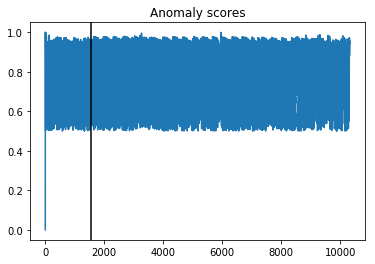

Time:  0.2536294460296631


['anomaly_scores/windowed_gaussian/nyc_taxi']

In [15]:
save_path = "anomaly_scores/windowed_gaussian/" + dataset_name

output_dict = ad.windowed_gaussian(gaussian_window_size=gaussian_window_size, 
                                   step_size = best_step_size, 
                                   plot_anomaly_score=True)

print("Time: ", output_dict["Time"])
joblib.dump(output_dict, save_path)

# HOTSAX

In [16]:
# only need for one window size
# save_path = "anomaly_scores/hotsax/" + dataset_name
# output_dict = ad.hotsax(win_size=50, num_discords=int((.2/100) * ad.get_length()),
#                a_size=3, paa_size=3, z_threshold=0.01,
#                plot_anomaly_score=True)
# print("Time: ", output_dict["Time"])
# joblib.dump(output_dict, save_path)